<a href="https://colab.research.google.com/github/sajiaakhter/mec-mini-projects/blob/master/mec_18_5_1_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Load Data**

In [2]:
filename = "/content/sample_data/IBM_2006-01-01_to_2018-01-01.csv"

df = pd.read_csv(filename)
df.head()


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [3]:
df.isnull().values.any()
df = df.dropna()
df.shape

(3019, 7)

In [4]:
df.index = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


**Visualizing the High and Low prices of IBM**

Text(0.5, 1.0, 'IBM Returns')

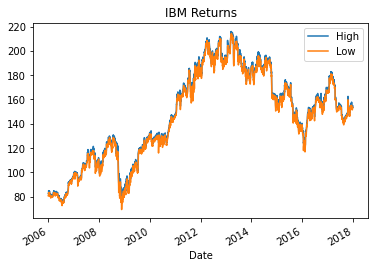

In [5]:
dr = df[['High', 'Low']]
dr.plot()
plt.title('IBM Returns')

**Q1: Visualize the Open and Close prices of IBM**

Text(0.5, 1.0, 'IBM Open-Close Prices')

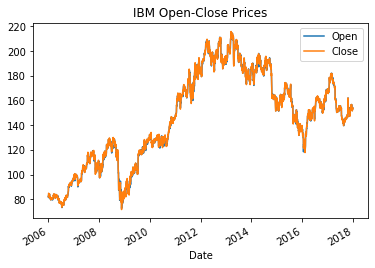

In [6]:
dr = df[['Open','Close']]
dr.plot()
plt.title('IBM Open-Close Prices')

**Q2: Visualize the Open and Close Cumulative Prices of IBM**

Text(0.5, 1.0, 'Open and Close Cumulative Prices of IBM')

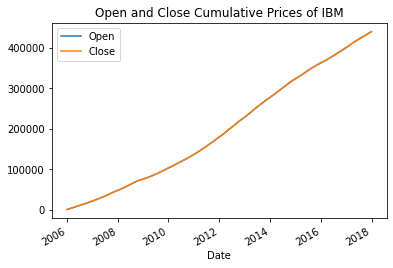

In [7]:
cmPrices = dr.cumsum()
cmPrices.plot()
plt.title('Open and Close Cumulative Prices of IBM')

**Q3: Visualize the Auto-Correlation plot for IBM Open prices with Lag 5**

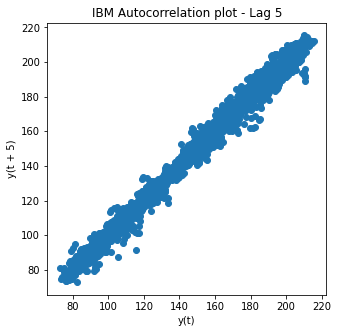

In [8]:
from pandas.plotting import lag_plot

plt.figure(figsize=(5,5))
lag_plot(df['Open'], lag=5)
plt.title('IBM Autocorrelation plot - Lag 5');

**Build Train-Test Datasets**

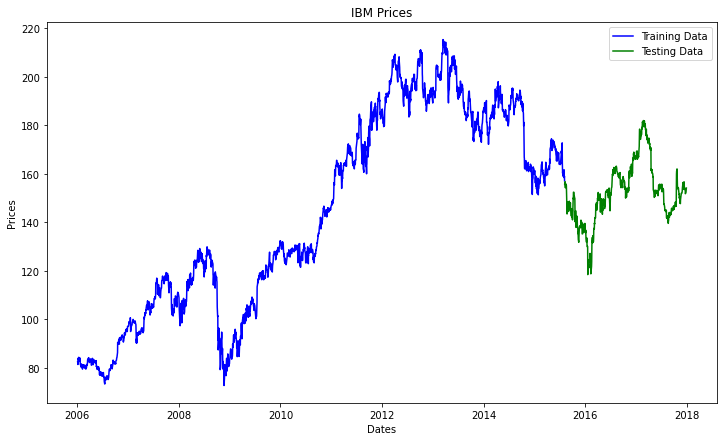

In [9]:
train_data, test_data = df.iloc[0:int(len(df)*0.8), :], df.iloc[int(len(df)*0.8):, :]
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend();

**The Augmented Dickey-Fuller test is an important statistical test which proves if the series is stationary or not**

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

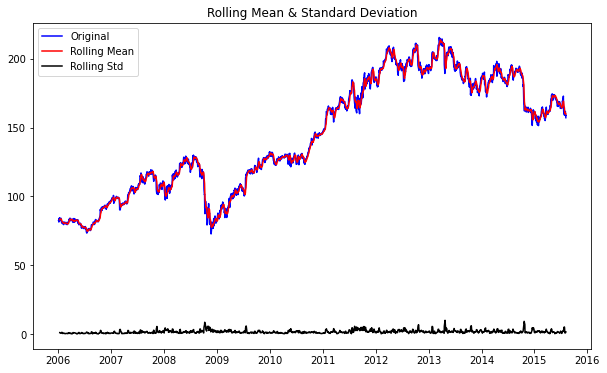

In [10]:
window = 7
train_series = train_data['Open']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   -1.487786
p-value                           0.539545
#Lags Used                        7.000000
Number of Observations Used    2407.000000
Critical Value (1%)              -3.433070
Critical Value (5%)              -2.862742
Critical Value (10%)             -2.567410
dtype: float64

**Q4: Apply a first order differencing on the training data**

In [12]:
train_diff = train_series.diff()
train_diff = train_diff.dropna(inplace = False)

**Q5: Visualize Rolling statistics for differenced train data**


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation for difference 1')

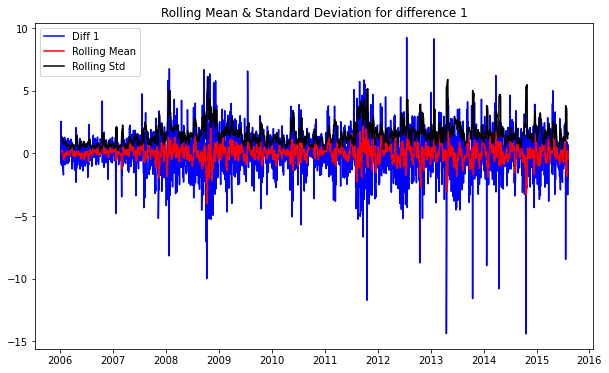

In [13]:
window = 7

#Determing rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_diff, color='blue',label='Diff 1')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for difference 1')

**Q6: Compute AD-Fuller Stats for differenced train data**


In [14]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -20.324277
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    2407.000000
Critical Value (1%)              -3.433070
Critical Value (5%)              -2.862742
Critical Value (10%)             -2.567410
dtype: float64


**Plot ACF and PACF on the original train series**

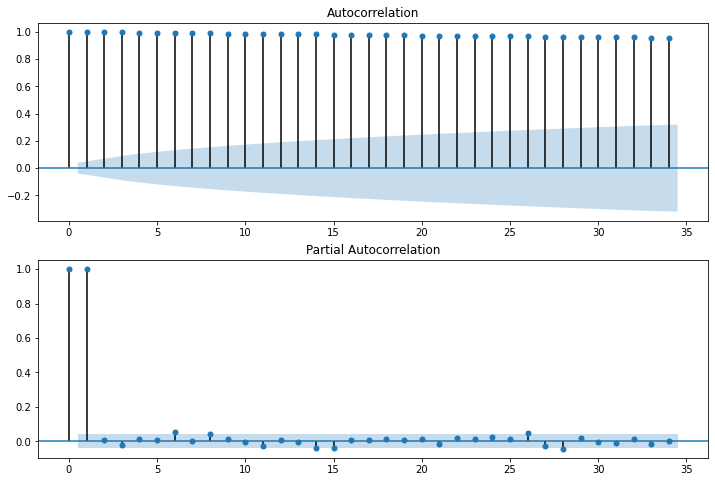

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_series, ax=ax[0]); # 
plot_pacf(train_series, ax=ax[1]);

**Q7: Plot ACF and PACF on the differenced train series**

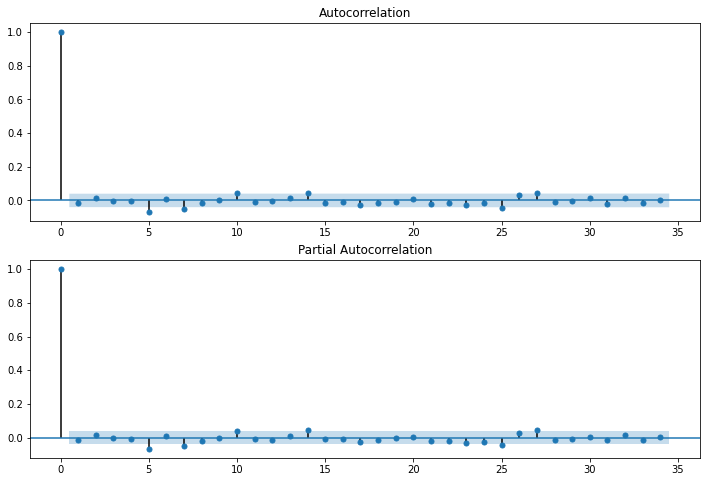

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_diff, ax=ax[0]); # 
plot_pacf(train_diff, ax=ax[1]);

**Symmetric Mean Absolute Percentage Error (SMAPE)**

In [22]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))


**Q8: Difference the Test Series**

In [31]:
test_series = test_data['Open']
test_diff = test_series.diff()
test_diff = test_diff.dropna(inplace = False)
print(test_diff.size)

603


**Q9: Train and Forecast using ARIMA Model by filling in the necessary blocks**

In [32]:
from statsmodels.tsa.arima.model import ARIMA


history = [x for x in train_diff]

predictions = list()
for t in range(len(test_diff)):

    # START_CODE_HERE - call the ARIMA Method with history and params
    model = ARIMA(history, order=(5,1,0))  # initialize the model with history and right order of parameters
    model_fit = model.fit()  # fit the model
    # END_CODE_HERE

    output = model_fit.forecast()  # use forecast on the fitted model
    yhat = output[0]#[0]
    predictions.append(yhat)

    obs = test_diff[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))


Test Series Point: 0	Predicted=-0.5229671095420623, Expected=0.8800000000000239
Test Series Point: 100	Predicted=0.5049973044335178, Expected=-0.5100000000000193
Test Series Point: 200	Predicted=0.0358783168862169, Expected=2.0500000000000114
Test Series Point: 300	Predicted=-0.3784100179427159, Expected=-0.020000000000010232
Test Series Point: 400	Predicted=-0.7058202187121888, Expected=-0.36000000000001364
Test Series Point: 500	Predicted=-0.29631462135139197, Expected=0.5699999999999932
Test Series Point: 600	Predicted=-0.2243318798404662, Expected=0.4399999999999977


**Reverse Transform the forecasted values**

In [33]:
reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((604,), (604,))

**Evaluate model performance**

In [34]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 17.604
Symmetric Mean absolute percentage error: 2.390


**Let's Visualize the forecast results**

In [35]:
reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_test_diff)
reverse_predictions_series.index = test_series.index


**Visualizing train, test and forecast prices**

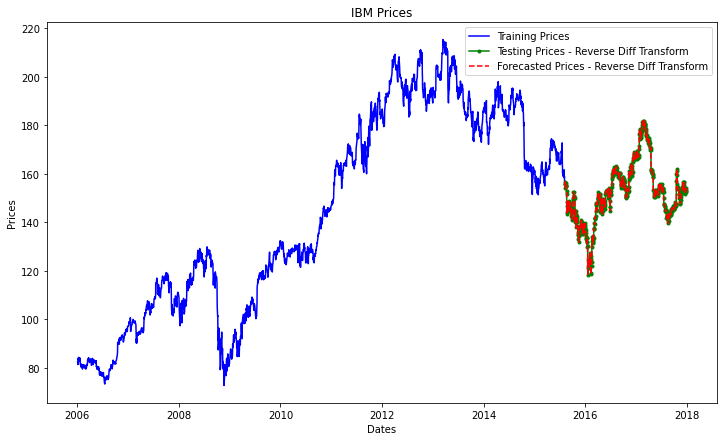

In [36]:
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_series, color='blue', label='Training Prices')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
plt.plot(reverse_test_diff_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
plt.legend();

**Q10: Visualize only test and forecast prices**

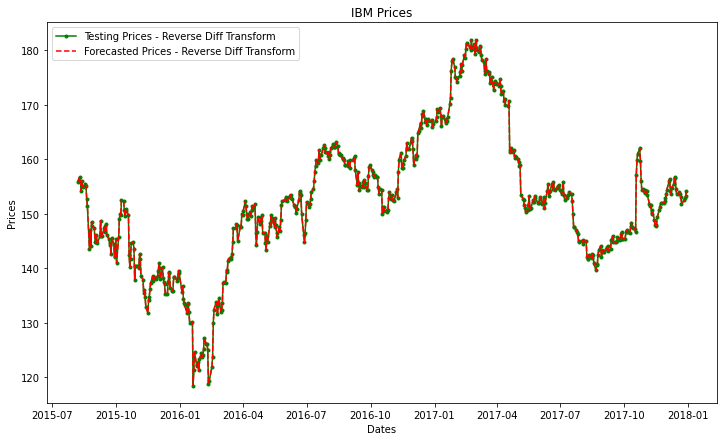

In [37]:
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
plt.plot(reverse_test_diff_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
plt.legend();

**Time Series Forecasting with Deep Learning**

**Headers**

In [42]:
# Let's load the libraries and dependencies for the deep learning model
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD



**Load Data**

In [43]:
df = pd.read_csv(filename)
df.isnull().values.any()
df = df.dropna()

df.index = pd.to_datetime(df['Date'])
df.head()


,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


**Build Train-Test Datasets**

In [48]:
# Splitting the train and test set considering 'Open' feature from the dataset
train_data, test_data = df.iloc[0:int(len(df)*0.8), :], df.iloc[int(len(df)*0.8):, :]
train_series = train_data[['Open']]
test_series = test_data[['Open']]
train_series.shape, test_series.shape

((2415, 1), (604, 1))

**Q11: Visualize train and test price data**

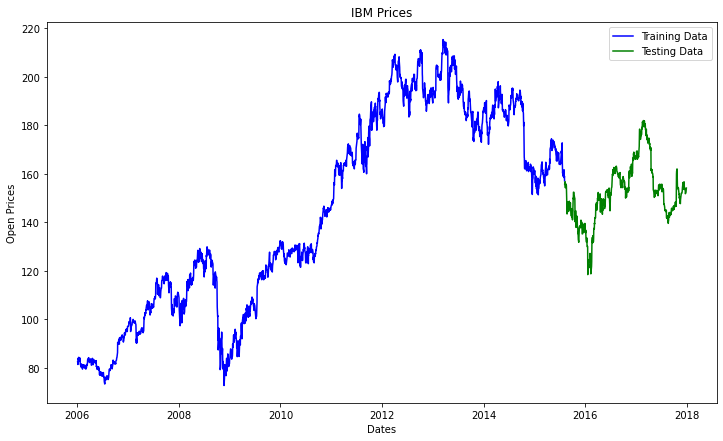

In [49]:
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(train_data['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend();

**Scaling**

In [53]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_series)
training_set_scaled.shape


(2415, 1)

**Train Data Preparation**

In [54]:
#1 output and 60 values inputs
# So for each element of training set (output), we have 60 previous training set elements (input)

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2355, 60), (2355,))

**Reshape X_train**

In [55]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
X_train.shape


(2355, 60, 1)

**LSTM Regression model**

**Q13: Build the LSTM based forecasting DL Model architecture**

In [56]:
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=False))

# The output layer
regressor.add(Dense(1))

# Compiling the RNN - optimizer(rmsprop)and loss(mean squared error)
regressor.compile(loss='mse', optimizer='rmsprop')
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


**Train the model**

In [57]:
regressor.fit(X_train,y_train, epochs=15, batch_size=64, validation_split=0.1, shuffle=False)


Epoch 1/15
34/34 [==============================] - 9s 137ms/step - loss: 0.0090 - val_loss: 0.0103
Epoch 2/15
34/34 [==============================] - 3s 89ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 3/15
34/34 [==============================] - 3s 84ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 4/15
34/34 [==============================] - 3s 92ms/step - loss: 0.0053 - val_loss: 0.0075
Epoch 5/15
34/34 [==============================] - 3s 87ms/step - loss: 0.0048 - val_loss: 0.0108
Epoch 6/15
34/34 [==============================] - 3s 85ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 7/15
34/34 [==============================] - 3s 84ms/step - loss: 0.0044 - val_loss: 0.0069
Epoch 8/15
34/34 [==============================] - 4s 118ms/step - loss: 0.0042 - val_loss: 0.0057
Epoch 9/15
34/34 [==============================] - 3s 97ms/step - loss: 0.0038 - val_loss: 0.0055
Epoch 10/15
34/34 [==============================] - 4s 113ms/step - loss: 0.0036 - val_loss: 0.0088
Epoch 

**Test Data Forecasting**

**Q14: Get the last 60 records from train_series**

In [65]:
from matplotlib.ticker import IndexLocator

train_last60 = train_series.tail(60)
print(train_last60.shape)
assert train_last60.shape == (60,), ("Oops! There is a data dimension mismatch error. Hint: Slice the last 60 records from train_series")
test_series.shape

(60,)


(604,)

**Q15: Combine both train_last60 and test_series together**

In [67]:
new_test_series =  pd.concat([train_last60,test_series])
print(new_test_series.shape)
assert new_test_series.shape == (664,), ("Oops! There is a data dimension mismatch error. Hint: Use pandas concat with the right axis parameter")

(664,)


**Q16: Scale the test dataset (new_test_series) using the trained MinMaxScaler transformer - sc**

In [81]:

test_set_scaled = sc.fit_transform(new_test_series.to_frame())
print(test_set_scaled.shape)

(664, 1)


**Prepare Test dataset Windows of 60 days each**

In [82]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len(test_set_scaled)):
    X_test.append(test_set_scaled[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(604, 60, 1)

**Model Prediction and Reverse Transform of Prices**

In [83]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price_revtrans = sc.inverse_transform(predicted_stock_price).ravel()
predicted_stock_price_revtrans_series = pd.Series(predicted_stock_price_revtrans)
predicted_stock_price_revtrans_series.index = test_series.index
predicted_stock_price_revtrans_series.shape, test_series.shape

19/19 [==============================] - 1s 20ms/step


((604,), (604,))

**Model Evaluation**

In [84]:
# Evaluating our model
error = mean_squared_error(test_series, predicted_stock_price_revtrans_series)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_series, predicted_stock_price_revtrans_series)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 37.429
Symmetric Mean absolute percentage error: 3.510


**Visualizing the results from model predictions**

**Visualize train, test and forecasted prices**

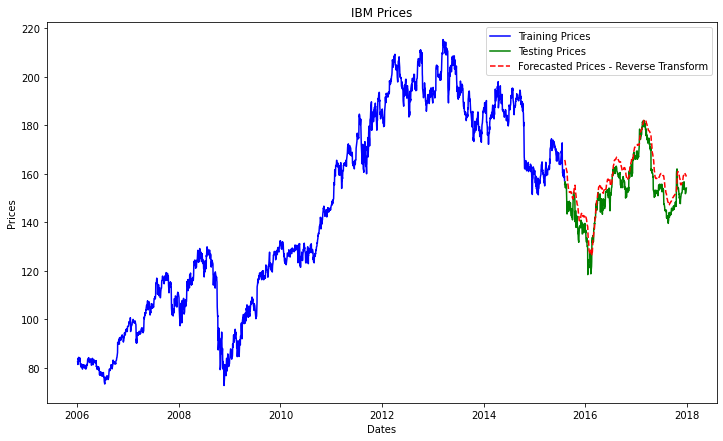

In [85]:
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_series, color='blue', label='Training Prices')
plt.plot(test_series, color='green', label='Testing Prices')
plt.plot(predicted_stock_price_revtrans_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Transform')
plt.legend();

**Q17: Visualize only test and forecast prices**

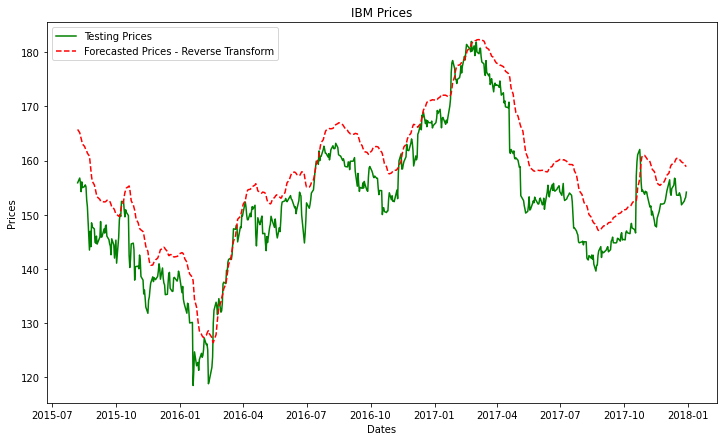

In [86]:
plt.figure(figsize=(12,7))
plt.title('IBM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(test_series, color='green', label='Testing Prices')
plt.plot(predicted_stock_price_revtrans_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Transform')
plt.legend();